In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
# dataset = pd.read_csv('https://raw.githubusercontent.com/JLZml/Credit-Scoring-Data-Sets/master/3.%20Kaggle/Give%20Me%20Some%20Credit/cs-test.csv')
dataset = pd.read_csv('dataset/creditscoreds.csv')
dataset

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
101498,101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,101502,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [3]:
dataset = dataset.drop(['Id','SeriousDlqin2yrs'], axis=1)
dataset

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...
101498,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [4]:
# d_variable = pd.read_csv("https://raw.githubusercontent.com/JLZml/Credit-Scoring-Data-Sets/master/3.%20Kaggle/Give%20Me%20Some%20Credit/sampleEntry.csv")
d_variable = pd.read_csv('dataset/sampleEntry.csv')
d_variable

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264
...,...,...
101498,101499,0.045363
101499,101500,0.343775
101500,101501,0.006970
101501,101502,0.121994


In [5]:
dataset['Probability'] = d_variable['Probability']
dataset

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Probability
0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0,0.080807
1,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0,0.040719
2,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0,0.011968
3,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0,0.067640
4,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0,0.108264
...,...,...,...,...,...,...,...,...,...,...,...
101498,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0,0.045363
101499,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0,0.343775
101500,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN,0.006970
101501,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0,0.121994


In [6]:
dataset = dataset.dropna()
dataset.isnull().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
Probability                             0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=10, input_dim=10, activation='relu'))

ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1))

ann.compile(optimizer='adam', loss='mean_squared_error')

ann.fit(X_train, y_train, batch_size=50, epochs=10)


Epoch 1/10
1303/1303 [==============================] - 4s 2ms/step - loss: 0.0266A: 0s - lo
Epoch 2/10
1303/1303 [==============================] - 3s 2ms/step - loss: 0.0047
Epoch 3/10
1303/1303 [==============================] - 3s 2ms/step - loss: 0.0042
Epoch 4/10
1303/1303 [==============================] - 3s 2ms/step - loss: 0.0033
Epoch 5/10
1303/1303 [==============================] - 3s 2ms/step - loss: 0.0023
Epoch 6/10
1303/1303 [==============================] - 3s 2ms/step - loss: 0.0018
Epoch 7/10
1303/1303 [==============================] - 3s 2ms/step - loss: 0.0017
Epoch 8/10
1303/1303 [==============================] - 3s 2ms/step - loss: 0.0017
Epoch 9/10
1303/1303 [==============================] - 3s 2ms/step - loss: 0.0017
Epoch 10/10
1303/1303 [==============================] - 3s 2ms/step - loss: 0.0016


In [9]:
y_pred = ann.predict(X_test)

In [10]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.041158021682276856

In [11]:
a_rmse = rmse/(max(dataset['Probability']) - min(dataset['Probability']))
print(a_rmse)

0.050037538446325525


In [24]:
batches = [10,20,30,50]
epochs = [5,10,20]

ResultsData=pd.DataFrame(columns=['TrialNumber', 'Batch Size', 'Epoch Size', 'RMSE'])

trial_no = 1
for batch_trial in batches:
    for epoch_trial in epochs:
        ann = tf.keras.models.Sequential()

        ann.add(tf.keras.layers.Dense(units=10, input_dim=10, activation='relu'))

        ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

        ann.add(tf.keras.layers.Dense(units=1))

        ann.compile(optimizer='adam', loss='mean_squared_error')

        ann.fit(X_train, y_train, batch_size=batch_trial, epochs=epoch_trial)
        
        y_pred = ann.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        ResultsData = ResultsData.append(
            pd.DataFrame([[trial_no, batch_trial, epoch_trial, rmse]], 
                         columns=['TrialNumber', 'Batch Size', 'Epoch Size', 'RMSE']))
        
#         print('Trial Number: ', trial_no, 'Batch Size:', batch_trial, 'Epoch Trial:', epoch_trial, 'rmse:',rmse)
        trial_no += 1
        
        
ResultsData

Epoch 1/5
6512/6512 [==============================] - 5s 765us/step - loss: 0.0097
Epoch 2/5
6512/6512 [==============================] - 5s 757us/step - loss: 0.0029
Epoch 3/5
6512/6512 [==============================] - 4s 687us/step - loss: 0.0025
Epoch 4/5
6512/6512 [==============================] - 4s 681us/step - loss: 0.0019
Epoch 5/5
6512/6512 [==============================] - 5s 764us/step - loss: 0.0023
Epoch 1/10
6512/6512 [==============================] - 5s 769us/step - loss: 0.0152
Epoch 2/10
6512/6512 [==============================] - 5s 736us/step - loss: 0.0049
Epoch 3/10
6512/6512 [==============================] - 5s 776us/step - loss: 0.0038
Epoch 4/10
6512/6512 [==============================] - 5s 716us/step - loss: 0.0031
Epoch 5/10
6512/6512 [==============================] - 5s 712us/step - loss: 0.0032
Epoch 6/10
6512/6512 [==============================] - ETA: 0s - loss: 0.002 - 5s 748us/step - loss: 0.0025
Epoch 7/10
6512/6512 [========================

2171/2171 [==============================] - 2s 734us/step - loss: 0.0015
Epoch 12/20
2171/2171 [==============================] - 2s 739us/step - loss: 0.0018
Epoch 13/20
2171/2171 [==============================] - 2s 765us/step - loss: 0.0013
Epoch 14/20
2171/2171 [==============================] - 2s 749us/step - loss: 0.0011
Epoch 15/20
2171/2171 [==============================] - 2s 917us/step - loss: 0.0011
Epoch 16/20
2171/2171 [==============================] - 2s 746us/step - loss: 9.8445e-04
Epoch 17/20
2171/2171 [==============================] - 2s 733us/step - loss: 0.0010
Epoch 18/20
2171/2171 [==============================] - 2s 726us/step - loss: 0.0011
Epoch 19/20
2171/2171 [==============================] - 2s 724us/step - loss: 7.6407e-04
Epoch 20/20
2171/2171 [==============================] - 2s 713us/step - loss: 6.9554e-04
Epoch 1/5
1303/1303 [==============================] - 1s 826us/step - loss: 0.0854
Epoch 2/5
1303/1303 [==============================] - 1

,TrialNumber,Batch Size,Epoch Size,RMSE
0,1,10,5,0.053530
0,2,10,10,0.042357
0,3,10,20,0.027477
0,4,20,5,0.090933
0,5,20,10,0.035691
0,6,20,20,0.080217
0,7,30,5,0.101047
0,8,30,10,0.050027
0,9,30,20,0.032439
0,10,50,5,0.175690


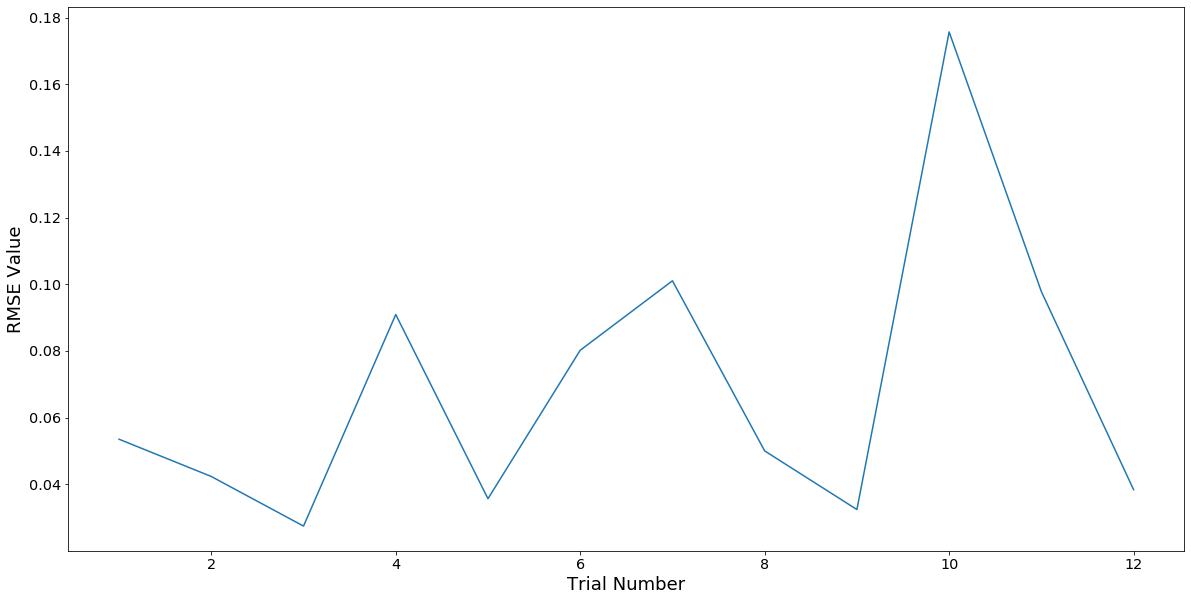

In [52]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'

plt.plot(ResultsData['TrialNumber'], ResultsData['RMSE'])
plt.xlabel('Trial Number', fontsize=18)
plt.ylabel('RMSE Value', fontsize=18)

plt.show()


In [53]:
ResultsData

,TrialNumber,Batch Size,Epoch Size,RMSE
0,1,10,5,0.053530
0,2,10,10,0.042357
0,3,10,20,0.027477
0,4,20,5,0.090933
0,5,20,10,0.035691
0,6,20,20,0.080217
0,7,30,5,0.101047
0,8,30,10,0.050027
0,9,30,20,0.032439
0,10,50,5,0.175690


In [54]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=10, input_dim=10, activation='relu'))

ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='mean_squared_error')

ann.fit(X_train, y_train, batch_size=10, epochs=20)

Epoch 1/20
6512/6512 [==============================] - 5s 773us/step - loss: 0.0045
Epoch 2/20
6512/6512 [==============================] - 5s 797us/step - loss: 0.0016
Epoch 3/20
6512/6512 [==============================] - 5s 758us/step - loss: 0.0015
Epoch 4/20
6512/6512 [==============================] - 5s 746us/step - loss: 0.0015
Epoch 5/20
6512/6512 [==============================] - 5s 751us/step - loss: 0.0015
Epoch 6/20
6512/6512 [==============================] - 5s 815us/step - loss: 0.0014
Epoch 7/20
6512/6512 [==============================] - 5s 811us/step - loss: 0.0013
Epoch 8/20
6512/6512 [==============================] - 5s 788us/step - loss: 0.0013
Epoch 9/20
6512/6512 [==============================] - 5s 796us/step - loss: 0.0012
Epoch 10/20
6512/6512 [==============================] - 4s 657us/step - loss: 0.0011
Epoch 11/20
6512/6512 [==============================] - 5s 710us/step - loss: 9.6984e-04
Epoch 12/20
6512/6512 [==============================] - 5s

In [55]:
y_pred = ann.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.022029094990555276